<a href="https://colab.research.google.com/github/ManideepLadi/cs6910_assignment3/blob/manideep/with_embedding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Input,Dense,LSTM,GRU,RNN,SimpleRNN,Softmax,Dropout,Concatenate
from keras.layers import TimeDistributed
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

from attention import AttentionLayer



import pandas as pd

Saving attention.py to attention (1).py


In [ ]:
pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 14.8 MB 63.8 MB/s 
     |████████████████████████████████| 3.8 MB 23.8 MB/s 
     |████████████████████████████████| 462 kB 67.3 MB/s 
     |████████████████████████████████| 132 kB 77.3 MB/s 
     |████████████████████████████████| 2.9 MB 65.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68717 sha256=f2454b5ee8f7c83fd3543adcd0233361ab30fc3df198b1f92d9658c69a4f6db5
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting

In [ ]:
pip install keras==2.4.0

     |████████████████████████████████| 170 kB 19.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Input,Dense,LSTM,GRU,RNN,SimpleRNN,Softmax,Dropout,Concatenate
from keras.layers import TimeDistributed
import matplotlib.pyplot as plt
from attention import AttentionLayer
import pandas as pd

     |████████████████████████████████| 231 kB 12.6 MB/s 
     |████████████████████████████████| 51 kB 7.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.2.0 which is incompatible.


In [ ]:
!pip install colorama

In [ ]:
def preprocess_data(file_name):
    
    input_texts = []
    target_texts = []
    inputdata=[]
    with open(file_name, "r", encoding="utf-8") as f:
        lines = f.read().split("\n")
    for line in lines[: len(lines) - 1]:
        inputdata.append(line)
   
    for line in inputdata:
        target_text,input_text, attestation = line.split("\t")
        
        target_text = "\t" + target_text + "\n"
        input_texts.append(input_text)
        target_texts.append(target_text)
        
    return(input_texts,target_texts)





Using TensorFlow backend.


In [ ]:
!wget https://storage.googleapis.com/gresearch/dakshina/dakshina_dataset_v1.0.tar
!tar -xvf '/content/dakshina_dataset_v1.0.tar'

--2022-05-14 08:02:27--  https://storage.googleapis.com/gresearch/dakshina/dakshina_dataset_v1.0.tar
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2008340480 (1.9G) [application/x-tar]
Saving to: ‘dakshina_dataset_v1.0.tar’

dakshina_dataset_v1 100%[===================>]   1.87G   182MB/s    in 11s     

2022-05-14 08:02:38 (181 MB/s) - ‘dakshina_dataset_v1.0.tar’ saved [2008340480/2008340480]

dakshina_dataset_v1.0/bn/
dakshina_dataset_v1.0/bn/lexicons/
dakshina_dataset_v1.0/bn/lexicons/bn.translit.sampled.test.tsv
dakshina_dataset_v1.0/bn/lexicons/bn.translit.sampled.train.tsv
dakshina_dataset_v1.0/bn/lexicons/bn.translit.sampled.dev.tsv
dakshina_dataset_v1.0/bn/native_script_wikipedia/
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-filt.valid.text.shuf.txt

In [ ]:
def preprocess_data(file_name):
    
    input_texts = []
    target_texts = []
    inputdata=[]
    with open(file_name, "r", encoding="utf-8") as f:
        lines = f.read().split("\n")
    for line in lines[: len(lines) - 1]:
        inputdata.append(line)
   
    for line in inputdata:
        target_text,input_text, attestation = line.split("\t")
        
        target_text = "\t" + target_text + "\n"
        input_texts.append(input_text)
        target_texts.append(target_text)
        
    return(input_texts,target_texts)





In [ ]:
input_words, target_words = preprocess_data("dakshina_dataset_v1.0/hi/lexicons/hi.translit.sampled.train.tsv")


max_encoder_seq_length = max([len(txt) for txt in input_words])
max_decoder_seq_length = max([len(txt) for txt in target_words])

input_characters = set()
target_characters = set()

for input_word in input_words:  
  for char in input_word:
        if char not in input_characters:
            input_characters.add(char)
for target_word in target_words:
    for char in target_word:
        if char not in target_characters:
            target_characters.add(char)
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))

num_input_tokens = len(input_characters)
num_target_tokens = len(target_characters)



print(len(input_characters), len(target_characters))
input_char_map = dict([(char, i+1) for i, char in enumerate(input_characters)])
target_char_map = dict([(char, i+1) for i, char in enumerate(target_characters)])
print(len(input_words), len(target_words))
print(input_char_map)


val_input_words, val_target_words = preprocess_data("dakshina_dataset_v1.0/hi/lexicons/hi.translit.sampled.dev.tsv")

test_input_words, test_target_words = preprocess_data("dakshina_dataset_v1.0/hi/lexicons/hi.translit.sampled.test.tsv")



In [ ]:


def one_hot_encoding(input_words, target_words):

    length = len(input_words)
    encoder_input_array = np.zeros(
        (length, max_encoder_seq_length, num_input_tokens+1), dtype="float32"
    )
    decoder_input_array = np.zeros(
        (length, max_decoder_seq_length, num_target_tokens+1), dtype="float32"
    )
    decoder_output_array = np.zeros(
        (length, max_decoder_seq_length, num_target_tokens+1), dtype="float32"
    )


    for i, (input_text, target_text) in enumerate(zip(input_words, target_words)):
        for t, char in enumerate(input_text):
            encoder_input_array[i, t, input_char_map[char]] = 1.0
        
        for t, char in enumerate(target_text):
            
            decoder_input_array[i, t, target_char_map[char]] = 1.0
            if t >=1 :
                
                decoder_output_array[i, t - 1, target_char_map[char]] = 1.0
        
    return(encoder_input_array,decoder_input_array,decoder_output_array)

encoder_input_array, decoder_input_array, decoder_output_array = one_hot_encoding(input_words,target_words)
val_encoder_input_array, val_decoder_input_array, val_decoder_output_array = one_hot_encoding(val_input_words,val_target_words)
test_encoder_input_array, test_decoder_input_array, test_decoder_output_array = one_hot_encoding(test_input_words,test_target_words)

print(decoder_input_array.shape)
encoder_input_array = np.argmax(encoder_input_array, axis=2)
decoder_input_array = np.argmax(decoder_input_array, axis=2)

val_encoder_input_array = np.argmax(val_encoder_input_array, axis=2)
test_encoder_input_array = np.argmax(test_encoder_input_array, axis=2)

val_decoder_input_array = np.argmax(val_decoder_input_array, axis=2)
test_decoder_input_array = np.argmax(test_decoder_input_array, axis=2)

reverse_input_char_map = dict((i, char) for char, i in input_char_map.items())
print(reverse_input_char_map)
reverse_target_char_map = dict((i, char) for char, i in target_char_map.items())
print(reverse_target_char_map)
reverse_target_char_map[0] = "\n"

In [ ]:
def define_model(num_cells, cell_type, num_encoder_layers, num_decoder_layers, input_embedding_size, dropout_fraction, beam_size):
   
    encoder_input = keras.Input(shape=(None, ), name="enc_input")
    encoder_embedding = keras.layers.Embedding(num_input_tokens + 1, input_embedding_size, name="enc_embedding", mask_zero=True)(encoder_input)

    
    states = {}
    for i in range(0, num_encoder_layers):
        if cell_type=="LSTM":

            encoder = keras.layers.LSTM(num_cells, return_state=True, return_sequences=True, name="enc_"+str(i+1), dropout=dropout_fraction, recurrent_dropout=dropout_fraction)

            if i==0:
                encoder_outputs, encoder_state_h, encoder_state_c = encoder(encoder_embedding)
            else:
                encoder_outputs, encoder_state_h, encoder_state_c = encoder(encoder_outputs)

            states['encoder_state_h_'+str(i+1)] =  encoder_state_h
            states['encoder_state_c_'+str(i+1)] =  encoder_state_c
              

        if cell_type=="RNN":
  
            encoder = keras.layers.SimpleRNN(num_cells, return_state=True, return_sequences=True, name="enc_"+str(i+1), dropout=dropout_fraction, recurrent_dropout=dropout_fraction)
            
            if i==0:
                whole_sequence_output, rnn_final_state = encoder(encoder_embedding)
            else:
                whole_sequence_output, rnn_final_state = encoder(whole_sequence_output)

            states['rnn_final_state_'+str(i+1)] =  rnn_final_state
            

        if cell_type=="GRU":
            
            encoder = keras.layers.GRU(num_cells, return_state=True, return_sequences=True, name="enc_"+str(i+1), dropout=dropout_fraction, recurrent_dropout=dropout_fraction)
            
            if i==0:
                whole_sequence_output, gru_final_state = encoder(encoder_embedding)
            else:
                whole_sequence_output, gru_final_state = encoder(whole_sequence_output)

            states['gru_final_state_'+str(i+1)] =  gru_final_state
            

    ## DECODER
    decoder_input = keras.Input(shape=(None, ), name="dec_input")
    decoder_embedding = keras.layers.Embedding(num_target_tokens + 1, 64, name="dec_embedding", mask_zero=True)(decoder_input)


    for i in range(0, num_decoder_layers):
        if cell_type=="LSTM":
            decoder_lstm = keras.layers.LSTM(num_cells, return_sequences=True, return_state=True, name="dec_"+str(i+1), dropout=dropout_fraction, recurrent_dropout=dropout_fraction)
            
            if i==0:
                decoder_outputs, decoder_state_h, decoder_state_c = decoder_lstm(decoder_embedding, initial_state = [states['encoder_state_h_'+str(i+1)], states['encoder_state_c_'+str(i+1)]])
            else:
                decoder_outputs, decoder_state_h, decoder_state_c = decoder_lstm(decoder_outputs, initial_state = [states['encoder_state_h_'+str(i+1)],states['encoder_state_c_'+str(i+1)]])
            

        if cell_type=="RNN":
            decoder_rnn = keras.layers.SimpleRNN(num_cells, return_sequences=True, return_state=True, name="dec_"+str(i+1), dropout=dropout_fraction, recurrent_dropout=dropout_fraction)
            if i==0:
                decoder_outputs, rnn_decoder_final_state = decoder_rnn(decoder_embedding, initial_state = states['rnn_final_state_'+str(i+1)])
            else:
                decoder_outputs, rnn_decoder_final_state = decoder_rnn(decoder_outputs, initial_state = states['rnn_final_state_'+str(i+1)])
            
        if cell_type=="GRU":
            decoder_gru = keras.layers.GRU(num_cells, return_sequences=True, return_state=True, name="dec_"+str(i+1), dropout=dropout_fraction, recurrent_dropout=dropout_fraction)
            if i==0:
                decoder_outputs, gru_decoder_final_state = decoder_gru(decoder_embedding, initial_state = states['gru_final_state_'+str(i+1)])
            else:
                decoder_outputs, gru_decoder_final_state = decoder_gru(decoder_outputs, initial_state = states['gru_final_state_'+str(i+1)])



    attention_layer = AttentionLayer(name='attention_layer')
    attention_out, attention_states = attention_layer([encoder_outputs,decoder_outputs])

    decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention_out])
    dense = Dense(num_target_tokens, activation='softmax', name='dec_dense')

    time_dense = TimeDistributed(dense, name='time_distributed_layer')
    decoder_outputs = time_dense(decoder_concat_input)
      

   
    model = keras.Model([encoder_input, decoder_input], decoder_outputs)

    return model

In [ ]:
def inferenceLSTM(model, num_cells):
   
    
    states={}
    enc_states=[]
    enc_inputs = model.input[0]
    dec_inputs = model.input[1]

    
    for layer in model.layers:
        string = layer.name
        i= string[-1]
        if(i.isnumeric() and string[0]=='e'):
          _, enc_h_state, enc_c_state= layer.output
          states['enc_h_state_'+i]=enc_h_state
          states['enc_c_state_'+i]=enc_c_state
          enc_states.append(states['enc_h_state_'+ i])
          enc_states.append(states['enc_c_state_'+ i])
  

    
    enc_model = keras.Model(enc_inputs, enc_states)

    

    
    decoders={}
    count=0
    for layer in model.layers:
        if layer.name=="dec_dense":
            dec_dense = layer
        if layer.name == "dec_embedding":
            dec_embedding = layer
        if layer.name=="attention_layer":
            attention_layer = layer
        if layer.name=="concat_layer":
            concat = layer
        string = layer.name
        i= string[-1]
        if(i.isnumeric() and string[0]=='d'):
          count+=1
          decoders['decoder_'+i]=layer
        
 

    for i in range(1,count+1):
      input_dec_h_state = keras.Input(shape=(num_cells,))
      input_dec_c_state = keras.Input(shape=(num_cells,))
      states['input_dec_h_state_'+str(i)]=input_dec_h_state
      states['input_dec_c_state_'+str(i)]=input_dec_c_state



    dec_states_inputs=[]
    for i in range(1,count+1):
      states['input_dec_states_'+str(i)]=[]
      states['input_dec_states_'+str(i)].append(states['input_dec_h_state_'+str(i)])
      states['input_dec_states_'+str(i)].append(states['input_dec_c_state_'+str(i)])
      dec_states_inputs= dec_states_inputs+states['input_dec_states_'+str(i)]


    

    dec_states=[]
    for i in range(1,count+1):
      if(i==1):
        dec_outputs, dec_h_state, dec_c_state = decoders['decoder_'+str(i)](dec_embedding(dec_inputs), states['input_dec_states_'+str(i)])
      else:
        dec_outputs, dec_h_state, dec_c_state = decoders['decoder_'+str(i)](dec_outputs, states['input_dec_states_'+str(i)])
      
      states['dec_h_state_'+str(i)]= dec_h_state
      states['dec_c_state_'+str(i)]= dec_c_state

      dec_states.append(states['dec_h_state_'+str(i)])
      dec_states.append(states['dec_c_state_'+str(i)])



    attention_out, attention_states = attention_layer([dec_states_inputs,dec_outputs])

    dec_concat = concate([dec_outputs,attention_out])

   

    dec_outputs = dec_dense(dec_concat)

 
    dec_model = keras.Model([dec_inputs] + dec_states_inputs , [dec_outputs] + dec_states +[attention_states])


   
    return enc_model, dec_model


In [ ]:
def inferenceOther(model, num_cells):
    
    
    states={}
    enc_states=[]
    enc_inputs = model.input[0]
    dec_inputs = model.input[1]

    
    for layer in model.layers:
        string = layer.name
        i= string[-1]
        if(i.isnumeric() and string[0]=='e'):
          _, enc_state= layer.output
          states['enc_state_'+i]= enc_state
          enc_states.append(states['enc_state_'+ i])
          
  

    
    enc_model = keras.Model(enc_inputs, enc_states)

   

    
    decoders={}
    count=0
    for layer in model.layers:
        if layer.name=="dec_dense":
            dec_dense = layer
        if layer.name == "dec_embedding":
            dec_embedding = layer
        if layer.name=="attention_layer":
            attention_layer = layer
        if layer.name=="concat_layer":
            concat = layer
        string = layer.name
        i= string[-1]
        if(i.isnumeric() and string[0]=='d'):
          count+=1
          decoders['decoder_'+i]=layer
        
    

    for i in range(1,count+1):
      input_dec_state = keras.Input(shape=(num_cells,))
      states['input_dec_state_'+str(i)]=input_dec_state
      

    

    dec_states_inputs=[]
    for i in range(1,count+1):
      states['input_dec_states_'+str(i)]=[]
      states['input_dec_states_'+str(i)].append(states['input_dec_state_'+str(i)])
      dec_states_inputs= dec_states_inputs+states['input_dec_states_'+str(i)]


    

    dec_states=[]
    for i in range(1,count+1):
      if(i==1):
        dec_outputs, dec_state = decoders['decoder_'+str(i)](dec_embedding(dec_inputs), states['input_dec_states_'+str(i)])
      else:
        dec_outputs, dec_state = decoders['decoder_'+str(i)](dec_outputs, states['input_dec_states_'+str(i)])
      
      states['dec_state_'+str(i)]= dec_state
      

      dec_states.append(states['dec_state_'+str(i)])
 

  
    
    
    attention_out, attention_states = attention_layer([dec_states_inputs,dec_outputs])

    dec_concat = concate([dec_outputs,attention_out])

   

    dec_outputs = dec_dense(dec_concat)

 
    dec_model = keras.Model([dec_inputs] + dec_states_inputs , [dec_outputs] + dec_states +[attention_states])

    
    return enc_model, dec_model


In [ ]:
def decode_words(input_words, enc_model, dec_model):
    
    batch_size = input_words.shape[0]
    
    enc_hidden_states = enc_model.predict(input_words)

    target_sequence = np.zeros((batch_size, 1, num_target_tokens+1))
    
    target_sequence[:, 0, target_char_map["\t"]] = 1.0
    target_sequence = np.argmax(target_sequence, axis=2)

    dec_words=[]
    for i in range(batch_size):
      dec_words.append("")

   

    for i in range(max_decoder_seq_length):

        outputs = dec_model.predict([target_sequence] + enc_hidden_states)

        outputs = list(outputs)

        output_tokens = outputs[0]


        sampled_char_indices = np.argmax(output_tokens[:, -1, :], axis=1)

        enc_hidden_states=[]
        
        target_sequence = np.zeros((batch_size, 1, num_target_tokens+1))

        for j, ch_index in enumerate(sampled_char_indices):
            dec_words[j] += reverse_target_char_map[ch_index]
            target_sequence[j, 0, ch_index] = 1.0

        target_sequence = np.argmax(target_sequence, axis=2)

        
        
        for i in range(1,len(outputs)):
          enc_hidden_states.append(outputs[i]) 

    i=0
    for word in dec_words:
      dec_words[i] = word[:word.find("\n")]
      i=i+1
    
    
   
    return dec_words

In [ ]:
def train(num_cells, cell_type, num_layers, input_embedding_size, dropout_fraction, beam_size, recurrent_dropout):
   

    model = define_model(num_cells, cell_type, num_layers, num_layers, input_embedding_size, dropout_fraction, beam_size)
    print(model.summary())

   
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    
    history = model.fit(
            [encoder_input_array, decoder_input_array],
            decoder_output_array,
            batch_size = 64,
            epochs = 1,
            verbose = 1,
            validation_data = ([val_encoder_input_array, val_decoder_input_array], val_decoder_output_array)
            )
    
    
    model.save("best_model_without_attention.h5")

    
    

    if cell_type == "LSTM":
        encoder_model, decoder_model = InferenceLSTM(model, num_cells)
    else:
        encoder_model, decoder_model = InferenceOther(model, num_cells)

    

  


    outputs = []
    n = encoder_input_array.shape[0]
    batch_size = 1000
    for i in range(0, n, batch_size):
        
        query = encoder_input_array[i:i+batch_size]
        
        decoded_words = decode_words(query, encoder_model, decoder_model)
        outputs = outputs + decoded_words

   
    ground_truths = [word[1:-1] for word in target_words]
    
    training_inference_accuracy = np.mean(np.array(outputs) == np.array(ground_truths))
    

    outputs = []
    n = val_encoder_input_array.shape[0]
    batch_size = 1000
    for i in range(0, n, batch_size):
       
        query = val_encoder_input_array[i:i+batch_size]
       
        decoded_words = decode_words(query, encoder_model, decoder_model)
        outputs = outputs + decoded_words

  
    ground_truths = [word[1:-1] for word in val_target_words]
    
    validation_inference_accuracy = np.mean(np.array(outputs) == np.array(ground_truths))
   
    

    return model, history

In [ ]:

num_cells = 256
cell_type = "LSTM"
num_layers = 3
num_encoder_layers = num_layers
num_decoder_layers = num_layers
input_embedding_size = 64
dropout_fraction = 0.1
recurrent_dropout = 0
beam_size = 1

model,history = train(num_cells, cell_type, num_layers, input_embedding_size, dropout_fraction, beam_size,recurrent_dropout)

In [ ]:
io = Inference(parent_model = parent.model,
               max_encoder_seq_length = pr_obj.max_encoder_seq_length ,
               max_decoder_seq_length = pr_obj.max_decoder_seq_length,
               target_token_index = pr_obj.target_token_index,
               reverse_target_char_index = pr_obj.reverse_target_char_index,
               latent_dimension = parent.latent_dimension,
               input_layers = parent.input_layers,
               output_layers = parent.output_layers,
               cell_type = parent.cell_type,
               num_layers = parent.no_of_encoder_layers
               )
io.build_inference_model()

In [ ]:
ridx = np.random.choice(len(en_ip_ts_text),100,replace=False)

for seq_index in ridx:
    st=seq_index
    en=st+1
    input_seq = en_ip_ts_data[st:en]
    decoded_sentence,char_by_char,att_mtx = decode_words(input_seq,, encoder_model, decoder_model)

    print(st)

    print( en_ip_ts_text[st])

    print( decoded_sentence)

    print(Style.BRIGHT + Fore.BLACK +'--'*10)
    
    print( de_ip_ts_text[st])
    

index_no : 1691
Input word: tambe
Decoded word: तांबे

True word: 	तांबे

--------------------
index_no : 3330
Input word: yatnaon
Decoded word: यातनाओं

True word: 	यातनाओं

--------------------
index_no : 530
Input word: enzyme
Decoded word: एंजीम

True word: 	एंजाइम

--------------------
index_no : 2120
Input word: nishpaap
Decoded word: निष्पाप

True word: 	निष्पाप

--------------------
index_no : 716
Input word: kamaate
Decoded word: कमाते

True word: 	कमाते

--------------------
index_no : 38
Input word: agra
Decoded word: अग्र

True word: 	अग्र

--------------------
index_no : 1174
Input word: chauki
Decoded word: चौकी

True word: 	चौकी

--------------------
index_no : 1012
Input word: gujara
Decoded word: गुजर

True word: 	गुजारा

--------------------
index_no : 664
Input word: kacche
Decoded word: कच्चे

True word: 	कच्चे

--------------------
index_no : 3417
Input word: rabha
Decoded word: राभ

True word: 	राभा

--------------------
index_no : 3961
Input word: shrankhalaaon
D

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
def Plot_Words(index_list,predictions,ip_text,true_text,title):


  fig, axs = plt.subplots(1, len(index_list),figsize=(14,3))

  font_prop = FontProperties(fname = '/content/gourav.ttf',size=15)

  
  
 
  
  for i in range(len(index_list)):

    axs[i].get_yaxis().set_visible(False)

    axs[i].get_xaxis().set_visible(False)

    

    axs[i].text(0.2,0.2,true_text[index_list[i]][1:-1],
                fontproperties = font_prop,bbox={'facecolor': 'olive', 'alpha': 0.5})
    
    axs[i].text(0.2,0.5,ip_text[index_list[i]])
    
    axs[i].text(0.2,0.7,predictions[i],
                fontproperties = font_prop,bbox={'facecolor': 'orange', 'alpha': 0.5})
    

  plt.suptitle(title)
  
  plt.show()

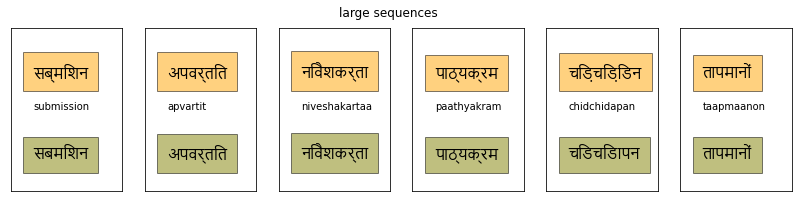

In [ ]:
long_index_nos= [4123,1234,2112,2404,1244,1319]

long_index_predictions = []
for i in long_index_nos:
  dec_seq =  decode_words(input_seq,, encoder_model, decoder_model)

  if dec_seq[-1]=='\n':

    dec_seq = dec_seq[:-1]
    
  long_index_predictions.append(dec_seq)

Plot_Words(long_index_nos ,long_index_predictions,en_ip_ts_text,de_ip_ts_text,'large sequences')

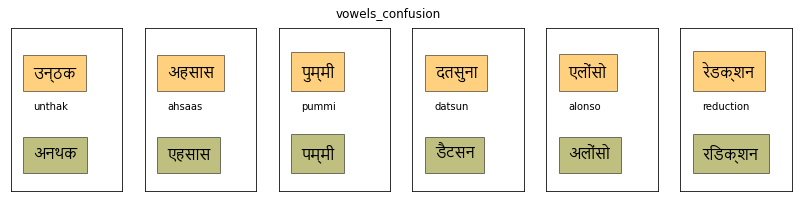

In [ ]:
vowel_conf_idx = [903,26,2234,1456,1456,2355]
vowel_conf_predictions = []
for i in vowel_conf_idx:
  dec_seq =  decode_words(input_seq, encoder_model, decoder_model)
  if dec_seq[-1]=='\n':
    dec_seq = dec_seq[:-1]
  vowel_conf_predictions.append(dec_seq)
Plot_Words(vowel_conf_idx,vowel_conf_predictions,en_ip_ts_text,de_ip_ts_text,'vowels_confusion')

In [ ]:
ground_truth = []
queries = []
outputs = []

random_indices = [np.random.randint(0, M_test) for i in range(9)]

fig = plt.figure(figsize=(10,10))

index=1
for i in random_indices:

    query = test_encoder_input_array[i:i+1]

    decoded_word,attention = inferenceLSTM(query,encoder_model,decoder_model)

    attention = np.array(attention)
    plt.subplot(3,3,index)
    plt.imshow(attention.reshape(attention.shape[0],attention.shape[-1])[:,:attention.shape[0]],cmap="Blues")

    plt.xticks(range(attention.shape[0]),decoded_word,fontproperties=FontProperties(fname = 'gourav.ttf'))

    plt.yticks(range(attention.shape[0]),test_input_words[i])

    queries.append(test_input_words[i])
    
    outputs.append(decoded_word.strip("\n"))

    ground_truth.append(test_target_words[i][1:-1]) 
    index+=1
plt.show()

df_train = pd.DataFrame({"Input": queries, "Ground Truth" : ground_truth, "Model output":outputs})
df_train

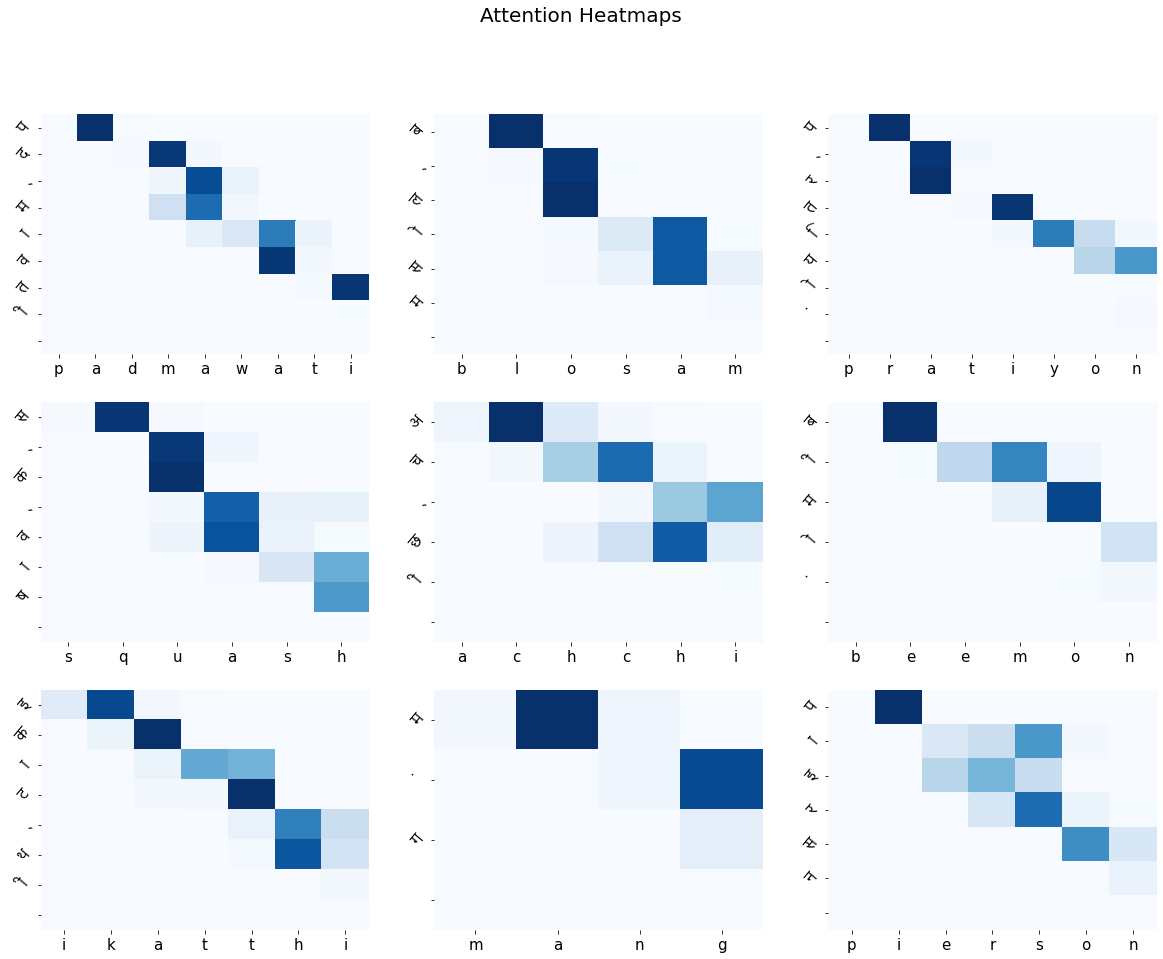

<h2>Visualization</h2>

In [ ]:
import warnings
import cv2 as cv
#!pip install moviepy
from moviepy.editor import ImageSequenceClip



for num in range(9):
  word = df_train.iloc[num,2]
  print(word)
  frames =[]

  org = df_train.iloc[num,0]
  
  warnings.filterwarnings('ignore')

  for i in range(len(word)):
    plt.text(0,0.9,word,fontproperties=FontProperties(fname = 'gourav.ttf'),fontsize = 30)

    plt.text(0.9,0.9,word[i],fontproperties=FontProperties(fname = 'gourav.ttf'),fontsize = 30)

    plt.axis('off')

    alphas = attentions[num][i]

    for j in range(len(org)):
      t=plt.text(0.5*(j/6),0.5,org[j],fontsize=30)

      t.set_bbox(dict(facecolor='blue', alpha=alphas[j], edgecolor='blue'))

    plt.savefig('save.png')

    plt.show()

    frames.append(cv.cvtColor(cv.imread('save.png'), cv.COLOR_BGR2RGB ))  

  clip = ImageSequenceClip(frames, fps=5)

  clip.write_gif('save' + str(num)+'.gif', fps=5)

ठ


म


र


ी


--------------------
द


न


प


त


ी


--------------------
द


ा


त


ा


--------------------
क


ौ


श


ल


त


ा


--------------------
न


ि


ल


ा


भ


--------------------
ग


ो


य


ल


--------------------
र


ा


उ


ं


ड


र


--------------------
य


ा


र


ि


य


ा


ं


--------------------
इ


ं


ड


ो


म


े


ट


्


र


ि


य


ल


--------------------
